# Calculating SFH with Diffstar


- adapted by SDC from https://github.com/ArgonneCPAC/diffstar/blob/main/docs/source/demo_diffstar_sfh.ipynb
- CCIN2P3 on K80 GPU
- conda environnment : conda_jax0325
- creation date : 2023/09/26
- last update  : 2023/11/10

   pip install --upgrade  "jax[cuda11_cudnn82]"=='0.3.25' "jaxlib"=='0.3.25' -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
   python -m pip install "jax[cuda11_cudnn82]"  "jaxlib[cuda11_cudnn82]"
   
   
   
      pip install --upgrade  "jax[cuda11_cudnn82]"=='0.3.25' "jaxlib"=='0.3.25' -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
    python -m pip install "jax[cuda11_cudnn82]"  "jaxlib[cuda11_cudnn82]"
    
    
    
| computer | processor | kernel              |    date     |
| --- | --- | --- | --- |
| CC       | CPU       | conda_jax0325_py310 | 2023-11-10  |



libraries 
=========

- jaxlib-0.3.25+cuda11.cudnn82
- jaxopt
- optax
- corner
- arviz
- numpyro




(conda_jax0325_py310) 
`/pbs/throng/lsst/users/dagoret/desc/StellarPopulationSynthesis>pip list | grep` 

| lib | version |
|--- | --- | 
|jax  |                         0.4.20 |
|jaxlib |                       0.4.20 |
ïjaxopt  |                      0.8.2 |    

This notebook gives two basic illustrations of how to use diffstar to model the SFHs of individual and populations of galaxies.

### SFH of an individual diffstar galaxy

In the cell below, we'll grab the default diffmah and diffstar parameters, then we'l use the `sfh_singlegal` function to calculate the SFH.

In [1]:
import numpy as np
from diffstar.defaults import DEFAULT_MAH_PARAMS
from diffstar.defaults import DEFAULT_MS_PARAMS
from diffstar.defaults import DEFAULT_Q_PARAMS

today_gyr = 13.8 
tarr = np.linspace(0.1, today_gyr, 100)

2023-09-27 16:23:44.020004: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/nvptx_compiler.cc:497] The NVIDIA driver's CUDA version is 11.3 which is older than the ptxas CUDA version (11.4.152). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


In [2]:
print("SFR : 13 parameters")

SFR : 13 parameters


In [3]:
#mah_params = (lgm0, logtc, early_index, late_index)
print('MAH 4 params (lgm0, logtc, early_index, late_index) : ',DEFAULT_MAH_PARAMS)

MAH 4 params (lgm0, logtc, early_index, late_index) :  [12.    0.05  2.5   1.  ]


In [4]:
#ms_params = (lgmcrit, lgy_at_mcrit, indx_lo, indx_hi, tau_dep)
print('MS 5 params (lgmcrit, lgy_at_mcrit, indx_lo, indx_hi, tau_dep) : ' ,DEFAULT_MS_PARAMS)

MS 5 params (lgmcrit, lgy_at_mcrit, indx_lo, indx_hi, tau_dep) :  [12. -1.  1. -1.  2.]


In [5]:
# q_params (lg_qt, qlglgdt, lg_drop, lg_rejuv)
print('Q 4 params (lg_qt, qlglgdt, lg_drop, lg_rejuv) : ',DEFAULT_Q_PARAMS)

Q 4 params (lg_qt, qlglgdt, lg_drop, lg_rejuv) :  [ 1.       -0.50725  -1.01773  -0.212307]


#### sfh_singlegal

In [6]:
from diffstar import sfh_singlegal

sfh_gal = sfh_singlegal(
    tarr, DEFAULT_MAH_PARAMS, DEFAULT_MS_PARAMS, DEFAULT_Q_PARAMS)

In [7]:
sfh_singlegal?

Signature:     
sfh_singlegal(
    tarr,
    mah_params,
    ms_params,
    q_params,
    lgt0=1.1398790864012365,
    fb=0.156,
    ms_param_type='bounded',
    q_param_type='bounded',
)
Call signature: sfh_singlegal(*args, **kwargs)
Type:           CompiledFunction
String form:    <CompiledFunction of <function sfh_singlegal at 0x7f82bcd8d040>>
File:           /pbs/throng/lsst/users/dagoret/desc/JAX2023/miniconda3/envs/conda_jax0325/lib/python3.8/site-packages/diffstar/sfh.py
Docstring:     
Calculate the star formation history of a single diffstar galaxy

Parameters
----------
tarr : ndarray, shape (n_t, )
    Age of the Universe in Gyr at which to compute the star formation history

mah_params : ndarray, shape (4, )
    mah_params = (lgm0, logtc, early_index, late_index)

ms_params : ndarray, shape (5, )
    By default the input ms_params will be interpreted as standard diffstar params:
        ms_params = (lgmcrit, lgy_at_mcrit, indx_lo, indx_hi, tau_dep)

    However, if ms_param

### SFHs of a population of diffstar galaxies

For purposes of this toy demonstration, we'll first create a small diffstar population by randomly adding noise to the default diffstar parameters.

In [8]:
n_gals = 10

mah_params_galpop = np.tile(DEFAULT_MAH_PARAMS, n_gals)
mah_params_galpop = mah_params_galpop.reshape((n_gals, -1))

ms_params_galpop = np.tile(DEFAULT_MS_PARAMS, n_gals)
ms_params_galpop = ms_params_galpop.reshape((n_gals, -1))

q_params_galpop = np.tile(DEFAULT_Q_PARAMS, n_gals)
q_params_galpop = q_params_galpop.reshape((n_gals, -1))

ms_noise = np.random.normal(
    loc=0, scale=0.25, size=(n_gals, DEFAULT_MS_PARAMS.size))

ms_params_galpop = ms_params_galpop + ms_noise

q_noise = np.random.normal(
    loc=0, scale=0.1, size=(n_gals, DEFAULT_Q_PARAMS.size))

q_params_galpop = q_params_galpop + q_noise

In [9]:
print('MAH params (lgm0, logtc, early_index, late_index) : ')
print(mah_params_galpop)

MAH params (lgm0, logtc, early_index, late_index) : 
[[12.    0.05  2.5   1.  ]
 [12.    0.05  2.5   1.  ]
 [12.    0.05  2.5   1.  ]
 [12.    0.05  2.5   1.  ]
 [12.    0.05  2.5   1.  ]
 [12.    0.05  2.5   1.  ]
 [12.    0.05  2.5   1.  ]
 [12.    0.05  2.5   1.  ]
 [12.    0.05  2.5   1.  ]
 [12.    0.05  2.5   1.  ]]


In [10]:
print('MS params (lgmcrit, lgy_at_mcrit, indx_lo, indx_hi, tau_dep) : ')
print(ms_params_galpop)

MS params (lgmcrit, lgy_at_mcrit, indx_lo, indx_hi, tau_dep) : 
[[11.67849171 -0.73103733  1.00789595 -0.4209907   2.12409172]
 [12.29210426 -0.98543879  1.17328306 -0.80635677  1.91207415]
 [12.21639303 -0.85385298  0.8417605  -1.20548658  1.96294339]
 [12.19095512 -1.23615832  0.6041451  -0.79282319  2.13496365]
 [11.96027192 -1.14129015  0.93737574 -1.36550778  1.75994057]
 [12.69358961 -1.21229063  1.22377136 -1.05795736  1.49334589]
 [11.65496608 -0.85626454  0.96870325 -0.74529502  2.1920708 ]
 [12.04360339 -1.11005429  1.4090002  -1.10056433  1.92976733]
 [12.31197563 -0.95033013  1.24650355 -0.85652705  1.83039433]
 [11.94785717 -1.37603888  1.04682822 -0.76882071  1.95595998]]


In [11]:
print('Q params (lg_qt, qlglgdt, lg_drop, lg_rejuv) : ')
print(q_params_galpop)

Q params (lg_qt, qlglgdt, lg_drop, lg_rejuv) : 
[[ 1.07216058e+00 -6.58845184e-01 -9.02234395e-01 -3.88500080e-01]
 [ 1.03746000e+00 -3.22864548e-01 -1.19369243e+00 -3.90611861e-01]
 [ 1.04837793e+00 -4.44431126e-01 -1.05057532e+00 -2.73296410e-01]
 [ 9.81076395e-01 -4.96288497e-01 -1.10312015e+00 -1.65948372e-01]
 [ 8.20096480e-01 -4.87942437e-01 -8.14418801e-01 -2.42891753e-01]
 [ 1.09615913e+00 -5.57544326e-01 -9.80319395e-01 -7.97850858e-05]
 [ 1.08036290e+00 -4.30098110e-01 -1.10254936e+00 -1.29799675e-01]
 [ 1.00256060e+00 -5.99024608e-01 -9.09992489e-01 -3.21801719e-01]
 [ 6.73423743e-01 -6.85928246e-01 -1.07853813e+00 -1.22559856e-01]
 [ 8.51428170e-01 -4.91150290e-01 -1.00252511e+00 -3.14669118e-01]]


#### sfh_galpop

The `sfh_galpop` calculates the SFH of an entire population at once. This calculation is vectorized with `jax.vmap` and so will be more efficient than a loop over successive calls to `sfh_singlegal`.

In [12]:
from diffstar import sfh_galpop

sfh_pop = sfh_galpop(
    tarr, mah_params_galpop, ms_params_galpop, q_params_galpop)

In [13]:
sfh_pop.shape

(10, 100)

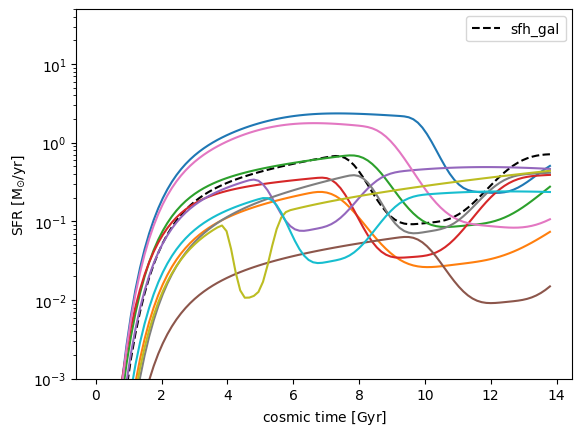

In [14]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 1)
ylim = ax.set_ylim(1e-3, 50)
yscale = ax.set_yscale('log')

__=ax.plot(tarr, sfh_gal, '--', color='k',label='sfh_gal')

for igal in range(n_gals):
    __=ax.plot(tarr, sfh_pop[igal, :])


xlabel = ax.set_xlabel(r'${\rm cosmic\ time\ [Gyr]}$')
ylabel = ax.set_ylabel(r'${\rm SFR\ [M_{\odot}/yr]}$')
ax.legend()

(0.0, 1.5)

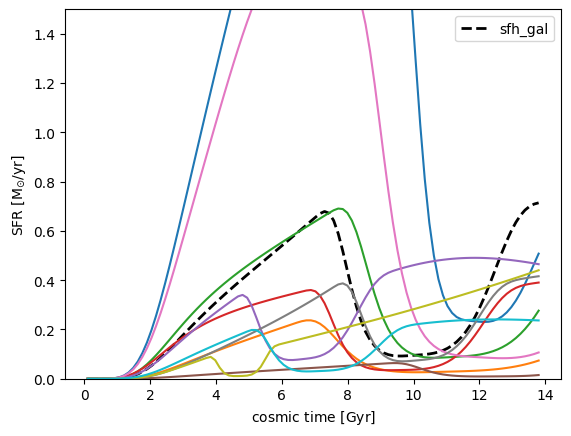

In [15]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 1)
ylim = ax.set_ylim(1e-3, 50)
#yscale = ax.set_yscale('log')

__=ax.plot(tarr, sfh_gal, '--', color='k',label='sfh_gal',lw=2)

for igal in range(n_gals):
    __=ax.plot(tarr, sfh_pop[igal, :])


xlabel = ax.set_xlabel(r'${\rm cosmic\ time\ [Gyr]}$')
ylabel = ax.set_ylabel(r'${\rm SFR\ [M_{\odot}/yr]}$')
ax.legend()
ax.set_ylim(0,1.5)